In [147]:
from biosppy.signals import ecg

In [156]:
import numpy as np
import csv

In [157]:
# load raw ECG signal
signal = np.loadtxt('C:\\Users\\123\\Desktop\\ecg.txt')

In [158]:
rpeaks = ecg.engzee_segmenter(signal=signal, sampling_rate=1000.0, threshold=0.48)

In [159]:
print (signal)

[2044. 2044. 2044. ... 2044. 2045. 2043.]


In [160]:
print (rpeaks)

ReturnTuple(rpeaks=array([  286,  1206,  2161,  6203,  8201,  9160, 10158, 11200, 12161,
       13142, 14165]))


In [162]:
ecg.extract_heartbeats(signal=signal.all(), rpeaks=rpeaks, sampling_rate=1000.0, before=0.2, after=0.4)

TypeError: object of type 'numpy.bool_' has no len()

In [163]:
sampling_rate=1000.0
before=0.2
after=0.4

In [164]:
# check inputs
if signal is None:
    raise TypeError("Please specify an input signal.")

if rpeaks is None:
    raise TypeError("Please specify the input R-peak locations.")

if before < 0:
    raise ValueError("Please specify a non-negative 'before' value.")
if after < 0:
    raise ValueError("Please specify a non-negative 'after' value.")

In [165]:
# convert delimiters to samples
before = int(before * sampling_rate)
after = int(after * sampling_rate)

In [166]:
R = np.sort(rpeaks)
length = len(signal)
templates = []
    

for r in R:
    a = r - before
    if a < 0:
        continue
    b = r + after
    if b > length:
        break
    templates.append(signal[a:b])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [167]:
templates = np.array(templates)

In [168]:
print (templates)

[]


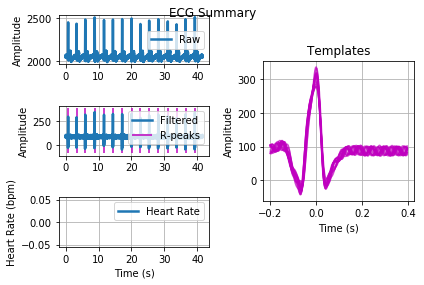

In [169]:
out=ecg.ecg(signal=signal, sampling_rate=361.0, show=True)

In [170]:
out

ReturnTuple(ts=array([0.00000000e+00, 2.76989843e-03, 5.53979686e-03, ...,
       4.15401668e+01, 4.15429367e+01, 4.15457066e+01]), filtered=array([87.49584148, 86.11677033, 85.20430688, ..., 87.90264166,
       87.45310579, 87.4530353 ]), rpeaks=array([  286,  1207,  2161,  3191,  4213,  5190,  6203,  7233,  8203,
        9160, 10158, 11201, 12162, 13142, 14165]), templates_ts=array([-2.00000000e-01, -1.97222222e-01, -1.94444444e-01, -1.91666667e-01,
       -1.88888889e-01, -1.86111111e-01, -1.83333333e-01, -1.80555556e-01,
       -1.77777778e-01, -1.75000000e-01, -1.72222222e-01, -1.69444444e-01,
       -1.66666667e-01, -1.63888889e-01, -1.61111111e-01, -1.58333333e-01,
       -1.55555556e-01, -1.52777778e-01, -1.50000000e-01, -1.47222222e-01,
       -1.44444444e-01, -1.41666667e-01, -1.38888889e-01, -1.36111111e-01,
       -1.33333333e-01, -1.30555556e-01, -1.27777778e-01, -1.25000000e-01,
       -1.22222222e-01, -1.19444444e-01, -1.16666667e-01, -1.13888889e-01,
       -1.11111111e

In [171]:
ecg.compare_segmentation(reference=rpeaks, test=rpeaks2, sampling_rate=361.0, offset=0, minRR=None, tol=0.05)

NameError: name 'rpeaks2' is not defined